In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
'''
 classify the diabetic patients using the random forest 
classifier, similar to what you have done in Task 1. However, this time, create a 
model using only the 5 following features: glucose, bmi, age, insulin and pregnant.
'''

# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
rf= RandomForestClassifier(n_estimators=10)

col_names = ['glucose', 'insulin', 'bmi', 'age', 'pregnant', 'label']

# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names) # dataset location
data.head()

,,,glucose,insulin,bmi,age,pregnant,label
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


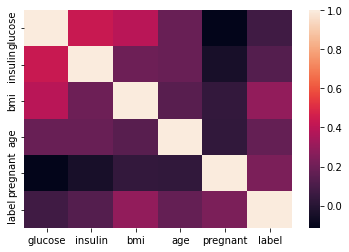

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data = sns.load_dataset("data")
#sns.pairplot(data)

ValueError: ignored

In [ ]:
# split dataset in features and target variable
feature_cols = ['glucose', 'insulin', 'bmi', 'age', 'pregnant']
X = data[feature_cols] # Features
y = data.label # Target variable

# Split the dataset into a training set and a testing set for performance evaluation
# Split dataset into training set and test set with 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Random Forest classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf = rf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 74.45887445887446


Text(0.5, 0, 'Number of Patients')

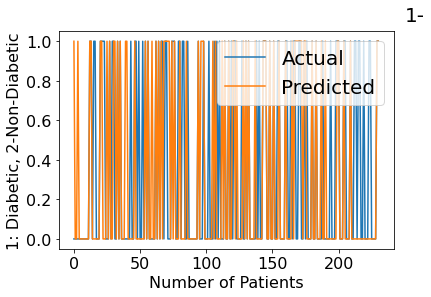

In [ ]:
# Plot predicted and the actual labels over time for the testing samples
plt.figure()
y_test=y_test.to_numpy()
plt.plot(y_test,label="Actual")
plt.plot(y_pred,label="Predicted")
plt.tick_params(labelsize=16)
plt.legend(loc='best', prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(250, 1.1, r'1-',fontsize=20)
plt.legend(loc='best', prop={'size': 20})
plt.ylabel('1: Diabetic, 2-Non-Diabetic', fontsize=16)
plt.xlabel('Number of Patients', fontsize=16)

In [ ]:
# Optimise Random Tree performance
# 'criterion' parameter allows us to use the different attribute selection measure. 

rf = RandomForestClassifier(criterion="entropy", max_depth=3) 
''' 
max_depth is the maximum depth of the tree. 
If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 
The higher value of maximum depth causes overfitting, and a lower value causes underfitting
'''

# Train Random Forest Classifer
# 'splitter' allows us to choose the split strategy. 
# Supported strategies are “best” to choose the best split and “random” to choose the best random split.

rf = rf.fit(X_train,y_train)
estimator = rf.estimators_[5]

# Predict the response for test dataset
y_pred = rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 74.45887445887446


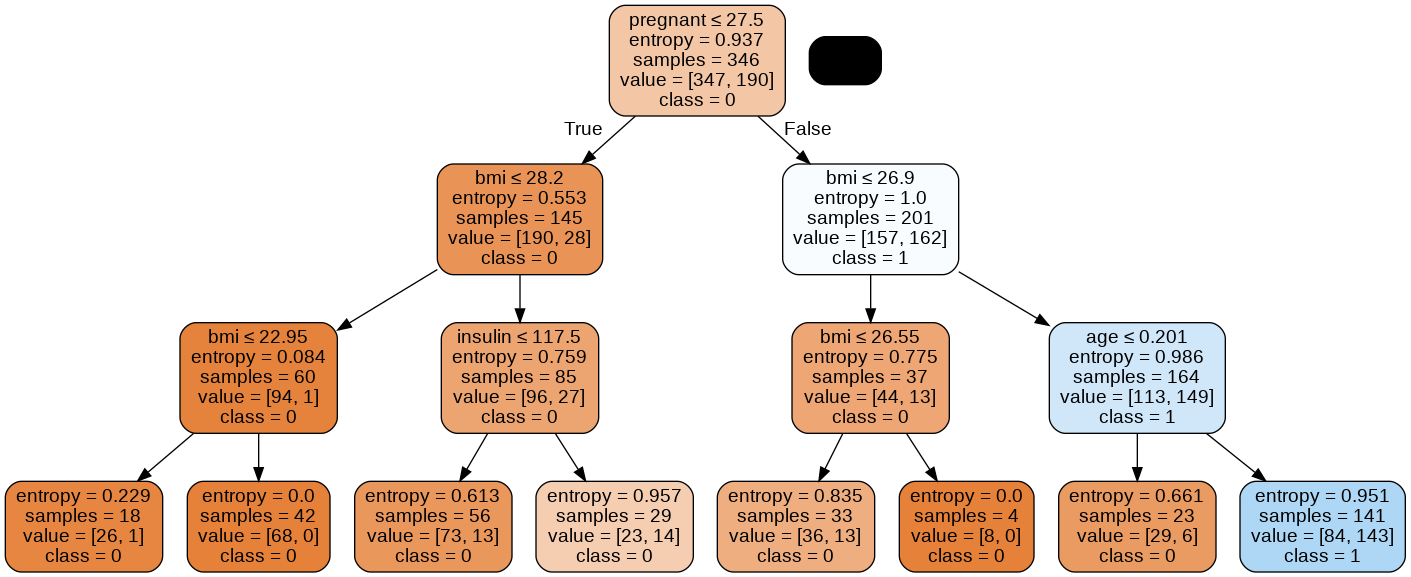

In [ ]:
# Visualising Random Forest

from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

n_nodes = rf.estimators_[0].tree_.node_count

dot_data = StringIO()
export_graphviz(rf.estimators_[0], out_file=dot_data, 
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('diabetes.png')
Image(graph.create_png())